In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [7]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

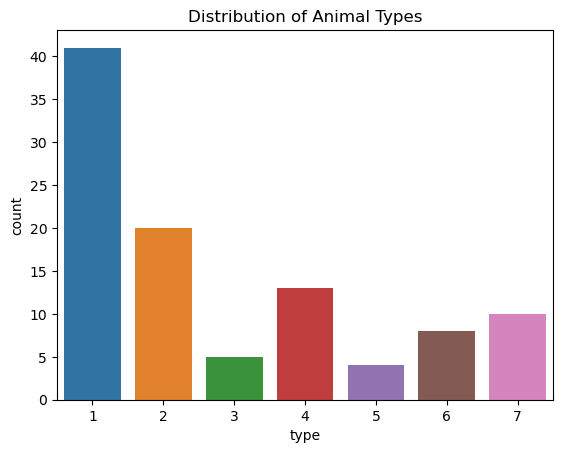

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

In [15]:
df = df.drop(columns=["animal name"])

# Separate features (X) and target variable (y)
X = df.drop(columns=["type"])
y = df["type"]


In [16]:
# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Implement the K-Nearest Neighbors algorithm
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

In [18]:
# Evaluate the classifier's performance on the testing set
# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


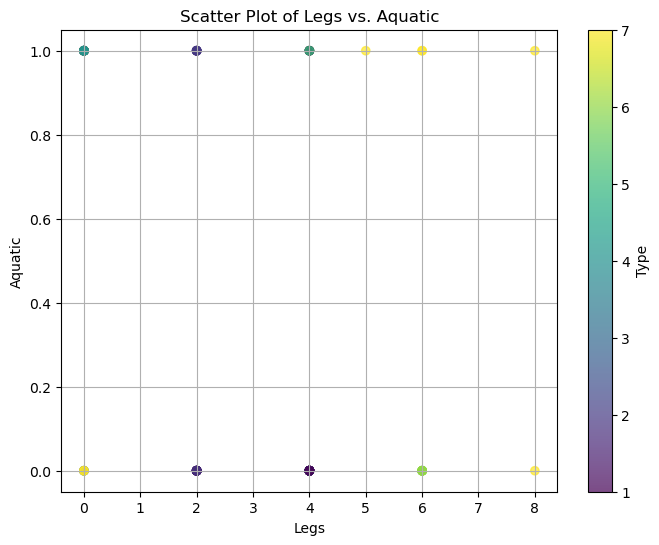

In [21]:
import matplotlib.pyplot as plt

# Extract the features and target variable
feature1 = df['legs']
feature2 = df['aquatic']
target = df['type']

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c=target, cmap='viridis', alpha=0.7)
plt.xlabel('Legs')
plt.ylabel('Aquatic')
plt.title('Scatter Plot of Legs vs. Aquatic')
plt.colorbar(label='Type')
plt.grid(True)
plt.show()

Interview Questions:
1. What are the key hyperparameters in KNN?
Key Hyperparameters in KNN:
1.Number of Neighbors (n_neighbors): Determines how many neighbors are considered during prediction.
2.Distance Metric (metric): Specifies the method to calculate distance between data points.
3.Weights (weights): Assigns weights to neighbors based on their distance.
4.Algorithm (algorithm): Selects the algorithm to find nearest neighbors.
5.Leaf Size (leaf_size): Determines the size of leaf nodes in tree-based algorithms.

2. What distance metrics can be used in KNN?
Distance Metrics in KNN:
1.Euclidean Distance: Straight-line distance between points.
2.Manhattan Distance: Sum of absolute differences between coordinates.
3.Minkowski Distance: Generalization of Euclidean and Manhattan distances.
4.Hamming Distance: Measures differences in binary vectors.
5.Cosine Similarity: Measures angle between vectors.
6.Chebyshev Distance: Maximum absolute difference along any dimension.